In [4]:
import pandas as pd
import numpy as np

In [5]:
X = pd.read_csv("Voitures.csv",delimiter=";", index_col=0)

X

,puissance,Longueur,Hauteur,poids,CO2,Origine,Carburant,4X4
Modele,,,,,,,,
Alfasud TI,75,421,149,1217,143,Europe,Diesel,non
Audi 100,138,426,146,1381,142,France,Diesel,non
Simca 1300,204,491,145,1723,223,France,Diesel,non
Citroen GS Club,150,486,158,1735,188,France,Diesel,non
Fiat 132,61,367,147,932,141,France,Essence,non
Lancia Beta,340,502,148,1835,291,Autre,Essence,non
Peugeot 504,102,421,143,1205,168,Europe,Essence,non
Renault 16 TL,202,455,167,1595,237,Autre,Diesel,oui
Renault 30,223,429,154,1595,235,Autre,Essence,non


In [6]:
X.dtypes
# 10 individus et 8variables

# 3 variables sont catégorielles

# On va séparer les variables numériques (X1) et catégorielles (X2)

puissance     int64
Longueur      int64
Hauteur       int64
poids         int64
CO2           int64
Origine      object
Carburant    object
4X4          object
dtype: object

In [7]:
X=X.rename(columns={"4X4":"quatre"})
X

import numpy as np

X1 = X.select_dtypes(exclude=['object'])

X2 = X.select_dtypes(include=[object])

X1.head()


,puissance,Longueur,Hauteur,poids,CO2
Modele,,,,,
Alfasud TI,75,421,149,1217,143
Audi 100,138,426,146,1381,142
Simca 1300,204,491,145,1723,223
Citroen GS Club,150,486,158,1735,188
Fiat 132,61,367,147,932,141


<function matplotlib.pyplot.show(close=None, block=None)>

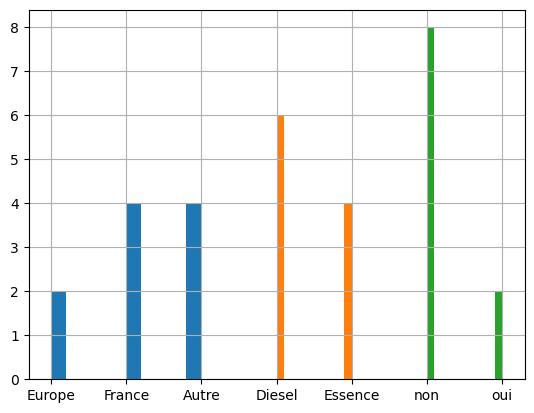

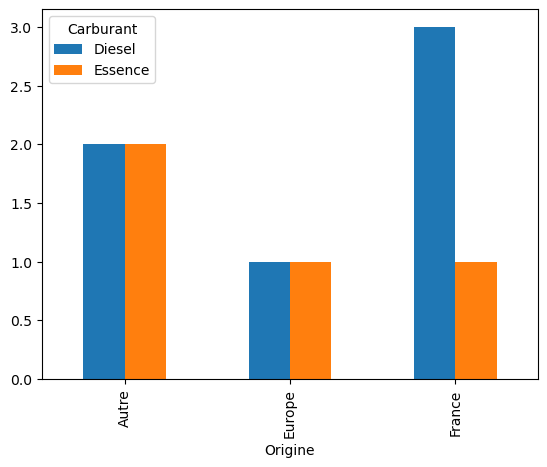

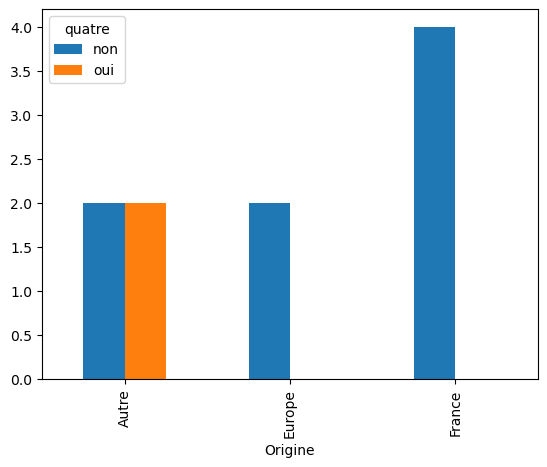

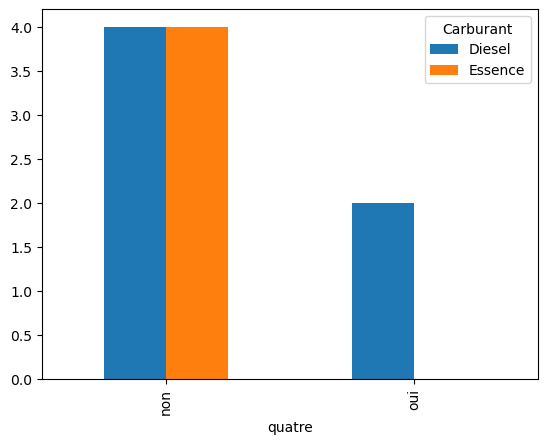

In [8]:
#On regarde un peu les modalités des variables catégorielles

import seaborn as sns

import matplotlib.pyplot as plt

X2.Origine.hist(bins=10)
X2.Carburant.hist(bins=10)
X2.quatre.hist(bins=10)

pd.crosstab(X2.Origine,X2.Carburant).plot(kind="bar") ; plt.show
pd.crosstab(X2.Origine,X2.quatre).plot(kind="bar") ; plt.show
pd.crosstab(X2.quatre,X2.Carburant).plot(kind="bar") ; plt.show


In [9]:
# On voit bien les biais initiaux des variables catégorielles...
# Toutes les voitures 4X4 sont au diesel et non europeenne
# Le diesel est sur-représenté en France
 

# On va transformer les variables catégorielles en variables binaires 

# Vérification avant qu'il n'y a aucune donnée manquante

In [10]:
X1.isnull().sum()


puissance    0
Longueur     0
Hauteur      0
poids        0
CO2          0
dtype: int64

In [11]:
X2bis=pd.get_dummies(X2)
# drop_first=True permet de ne garder qu'une variable binaire plutôt que 2 identiques
X2bis.head()

,Origine_Autre,Origine_Europe,Origine_France,Carburant_Diesel,Carburant_Essence,quatre_non,quatre_oui
Modele,,,,,,,
Alfasud TI,0,1,0,1,0,1,0
Audi 100,0,0,1,1,0,1,0
Simca 1300,0,0,1,1,0,1,0
Citroen GS Club,0,0,1,1,0,1,0
Fiat 132,0,0,1,0,1,1,0


In [12]:
# Oncalcule "à la main" les podérations de chaque modalités afin d'obtenir des données normalisées

In [13]:
import numpy 
n=X2bis.shape[0]
print(n)
X2ter2=(numpy.sum(X2bis,axis=0))/n
print(X2ter2)
X2ter2=numpy.sqrt(X2ter2)
X2ter=X2bis/X2ter2
X2ter.head()

10
Origine_Autre        0.4
Origine_Europe       0.2
Origine_France       0.4
Carburant_Diesel     0.6
Carburant_Essence    0.4
quatre_non           0.8
quatre_oui           0.2
dtype: float64


,Origine_Autre,Origine_Europe,Origine_France,Carburant_Diesel,Carburant_Essence,quatre_non,quatre_oui
Modele,,,,,,,
Alfasud TI,0.0,2.236068,0.000000,1.290994,0.000000,1.118034,0.0
Audi 100,0.0,0.000000,1.581139,1.290994,0.000000,1.118034,0.0
Simca 1300,0.0,0.000000,1.581139,1.290994,0.000000,1.118034,0.0
Citroen GS Club,0.0,0.000000,1.581139,1.290994,0.000000,1.118034,0.0
Fiat 132,0.0,0.000000,1.581139,0.000000,1.581139,1.118034,0.0


In [14]:
# Les données sont maintenant prêtes pour l'analyse. Les valeurs tiennent compte de la sur ou sous représentation de la modalité.
#Les modalités faiblement représentées sont "tirées". Comme les "outliers" des données continues, elles vont "tirer" les axes factoriels.


# On regarde maintenant les données continues: corrélations et distributions

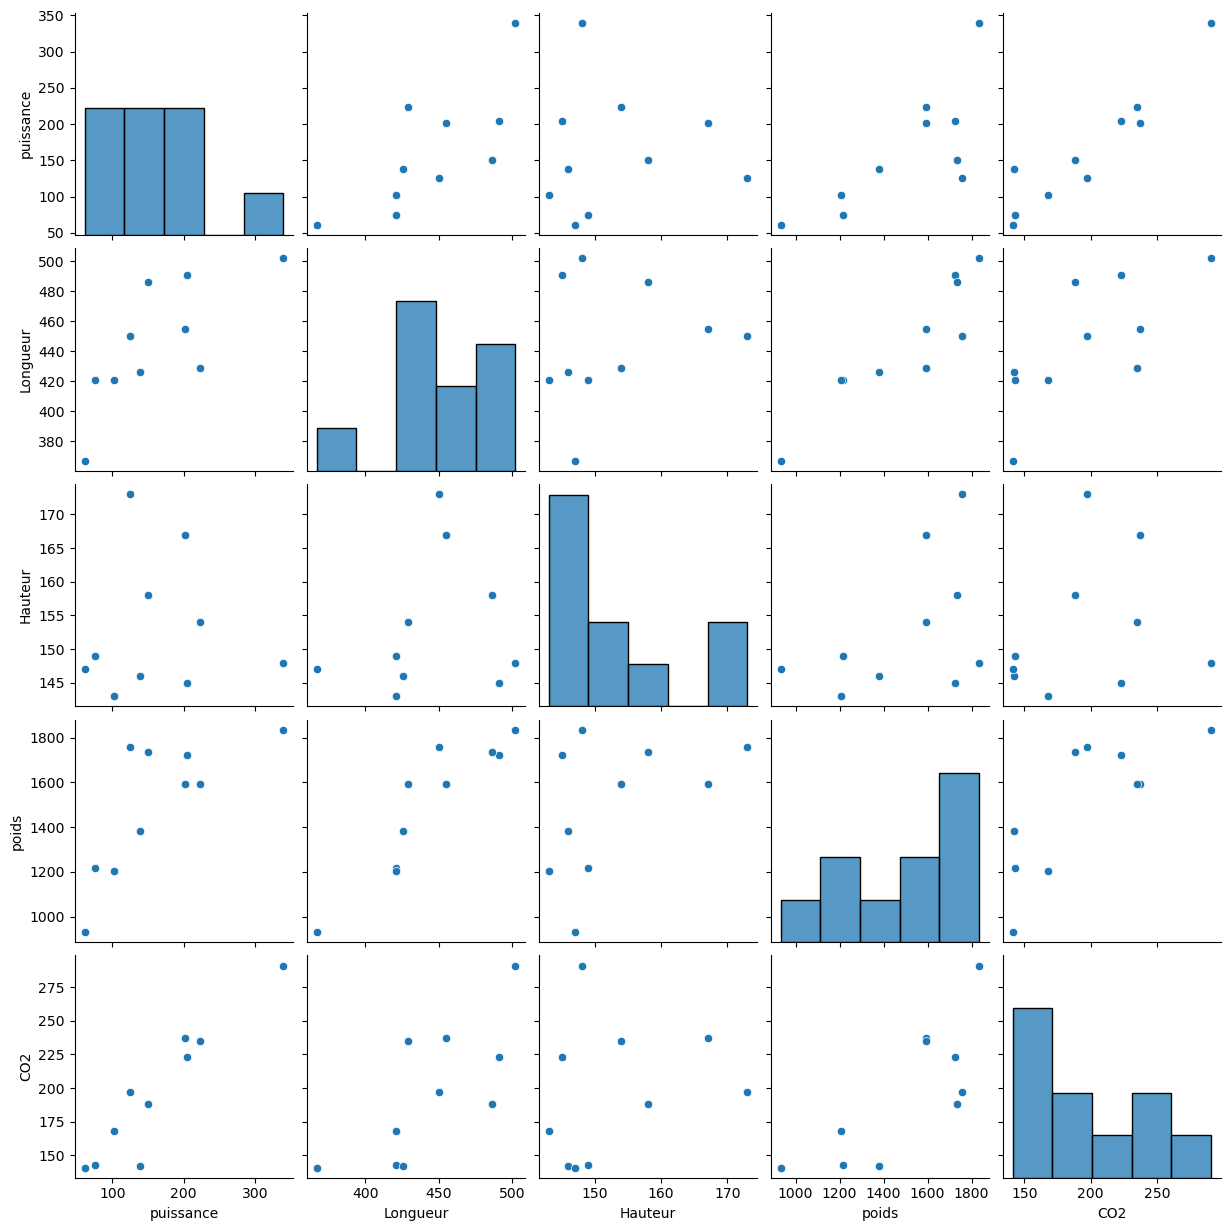

In [15]:
import seaborn as sns
sns.pairplot(X1)

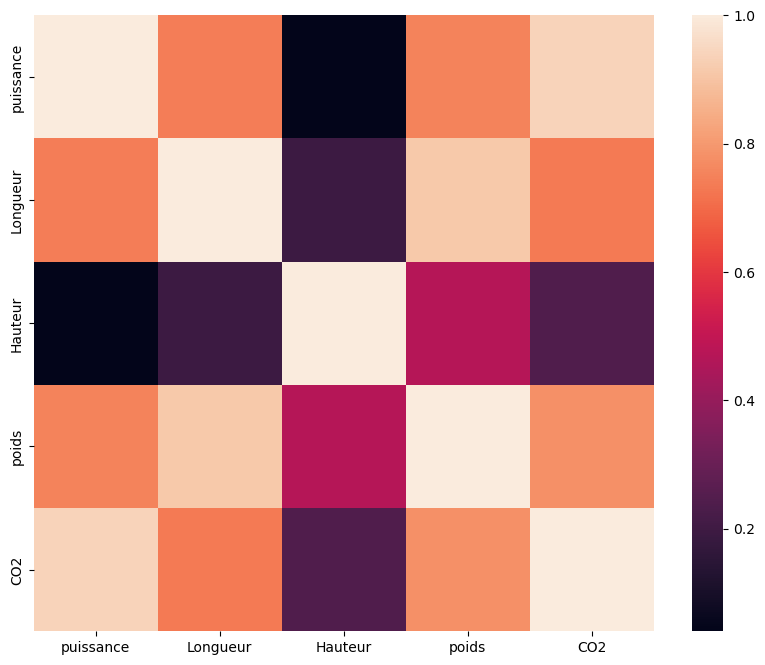

In [16]:
import matplotlib.pyplot as plt


corr=X1.corr()
corr=corr.round(2)
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr)

plt.show()

In [17]:
# On va centrer/réduire. Intéressant de comparer dans le futur avec une transformation "RobustScaler"

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Z = StandardScaler().fit_transform(X1)
Z1 = pd.DataFrame(data = Z, columns = X1.columns)
Z1.head()

,puissance,Longueur,Hauteur,poids,CO2
0,-1.102875,-0.614031,-0.418854,-0.988562,-1.126565
1,-0.304241,-0.485033,-0.732994,-0.410579,-1.147623
2,0.532422,1.191942,-0.837708,0.794727,0.558018
3,-0.152121,1.062944,0.523567,0.837018,-0.178987
4,-1.280349,-2.007209,-0.628281,-1.992984,-1.168680


In [19]:
Z1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   puissance  10 non-null     float64
 1   Longueur   10 non-null     float64
 2   Hauteur    10 non-null     float64
 3   poids      10 non-null     float64
 4   CO2        10 non-null     float64
dtypes: float64(5)
memory usage: 528.0 bytes


In [20]:
# Intéressant de faire 3 études: ACP avec les données continues initiales. ACM avec les données catégorielles. AFDM avec les données complètes.
#On regarde le dernier cas ici

In [21]:
X2ter=X2ter.reset_index(drop=True)

X4=Z1.join(X2ter)
X4["Modele"]= X.index
X4.index=X4.Modele
X4.drop (X4.columns [-1], axis = 1, inplace = True)
#X=pd.DataFrame(X)
X4.head()

,puissance,Longueur,Hauteur,poids,CO2,Origine_Autre,Origine_Europe,Origine_France,Carburant_Diesel,Carburant_Essence,quatre_non,quatre_oui
Modele,,,,,,,,,,,,
Alfasud TI,-1.102875,-0.614031,-0.418854,-0.988562,-1.126565,0.0,2.236068,0.000000,1.290994,0.000000,1.118034,0.0
Audi 100,-0.304241,-0.485033,-0.732994,-0.410579,-1.147623,0.0,0.000000,1.581139,1.290994,0.000000,1.118034,0.0
Simca 1300,0.532422,1.191942,-0.837708,0.794727,0.558018,0.0,0.000000,1.581139,1.290994,0.000000,1.118034,0.0
Citroen GS Club,-0.152121,1.062944,0.523567,0.837018,-0.178987,0.0,0.000000,1.581139,1.290994,0.000000,1.118034,0.0
Fiat 132,-1.280349,-2.007209,-0.628281,-1.992984,-1.168680,0.0,0.000000,1.581139,0.000000,1.581139,1.118034,0.0


In [22]:
import sklearn as sk

In [23]:
from sklearn.decomposition import PCA

In [24]:
print(PCA)

<class 'sklearn.decomposition._pca.PCA'>


In [25]:
acp=PCA(svd_solver='full')
print(acp)

PCA(svd_solver='full')


In [26]:
coord1=acp.fit_transform(X4)

In [27]:
print(coord1)

[[ 2.31780488e+00  6.87271028e-01 -7.84095593e-02 -1.68280345e+00
  -1.42093614e-01  4.29438758e-01 -2.05498683e-01  1.74641324e-02
   4.68831521e-02  1.50491456e-16]
 [ 1.44536838e+00  1.22286335e-01  1.37059476e+00  5.64739986e-01
  -4.19769900e-01  4.28251958e-01  2.93921882e-01 -1.38478152e-01
  -2.65034431e-02  1.50491456e-16]
 [-7.79731139e-01 -1.01856317e+00  1.96251470e+00 -1.63893117e-01
  -3.02878064e-01 -2.84252368e-01  3.13447838e-02  2.61155977e-01
   9.91643484e-03  1.50491456e-16]
 [-5.41062892e-01  1.60059140e-01  1.89411439e+00  3.27065750e-03
   7.76188937e-01 -1.00227511e-01 -2.02713659e-01 -1.26104223e-01
  -2.92707085e-02  1.50491456e-16]
 [ 3.27586403e+00 -2.51169274e-02 -6.53761116e-01  1.84390241e+00
  -2.67727997e-02 -2.64394680e-01 -1.37602850e-01  2.61040178e-03
   4.31089624e-02  1.50491456e-16]
 [-2.95770457e+00 -2.62811174e+00 -6.67643746e-01 -1.58881630e-01
  -1.16999786e-01 -3.23660344e-02  1.93057840e-02 -1.53339033e-01
   5.88578995e-02  1.50491456e-16

In [28]:
print(acp.explained_variance_ratio_)

[4.74792847e-01 2.35765258e-01 1.59857542e-01 9.29296826e-02
 1.82255648e-02 1.27189214e-02 3.73612805e-03 1.75613559e-03
 2.17920143e-04 2.51640871e-33]


In [29]:
# On a 90% de la variance expliquée sur 2 axes

In [30]:
# Les Valeurs propres
eigval = acp.explained_variance_
print([eigval])

[array([4.74792847e+00, 2.35765258e+00, 1.59857542e+00, 9.29296826e-01,
       1.82255648e-01, 1.27189214e-01, 3.73612805e-02, 1.75613559e-02,
       2.17920143e-03, 2.51640871e-32])]


In [31]:
#On a les 4 premières VP >1 

#On va regarder l'évolution des VP en fonction des composantes principales

12
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[4.74792847e+00 2.35765258e+00 1.59857542e+00 9.29296826e-01
 1.82255648e-01 1.27189214e-01 3.73612805e-02 1.75613559e-02
 2.17920143e-03 2.51640871e-32]


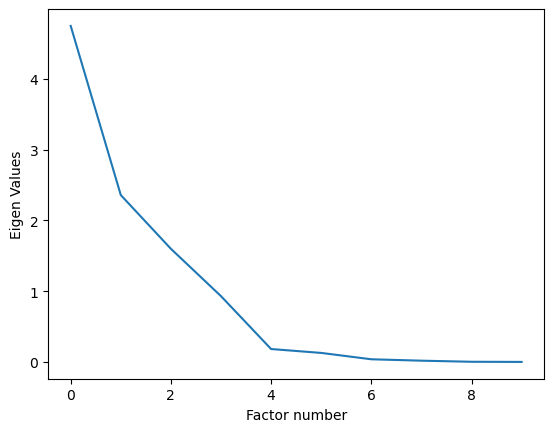

In [32]:
#nombre de variables
p = X4.shape[1]
print(p)
nunu=np.arange(p)
print(nunu)
print(eigval)
#nombre d'observations
n = X4.shape[0]
#matrice des X
X = X4.values

import matplotlib.pyplot as plt
plt.plot(np.arange(10),eigval)
plt.ylabel("Eigen Values")
plt.xlabel("Factor number")
plt.show()

In [33]:
# On va regarder sur 2 CP (90% déjà de variance expliquée) 

acp=PCA(n_components=2,svd_solver='full')
coord=acp.fit_transform(X4)
print(coord)

[[ 2.31780488  0.68727103]
 [ 1.44536838  0.12228634]
 [-0.77973114 -1.01856317]
 [-0.54106289  0.16005914]
 [ 3.27586403 -0.02511693]
 [-2.95770457 -2.62811174]
 [ 2.31613266 -0.79534141]
 [-2.25591897  1.8404259 ]
 [-0.93180905 -1.09085231]
 [-1.88894333  2.74794316]]


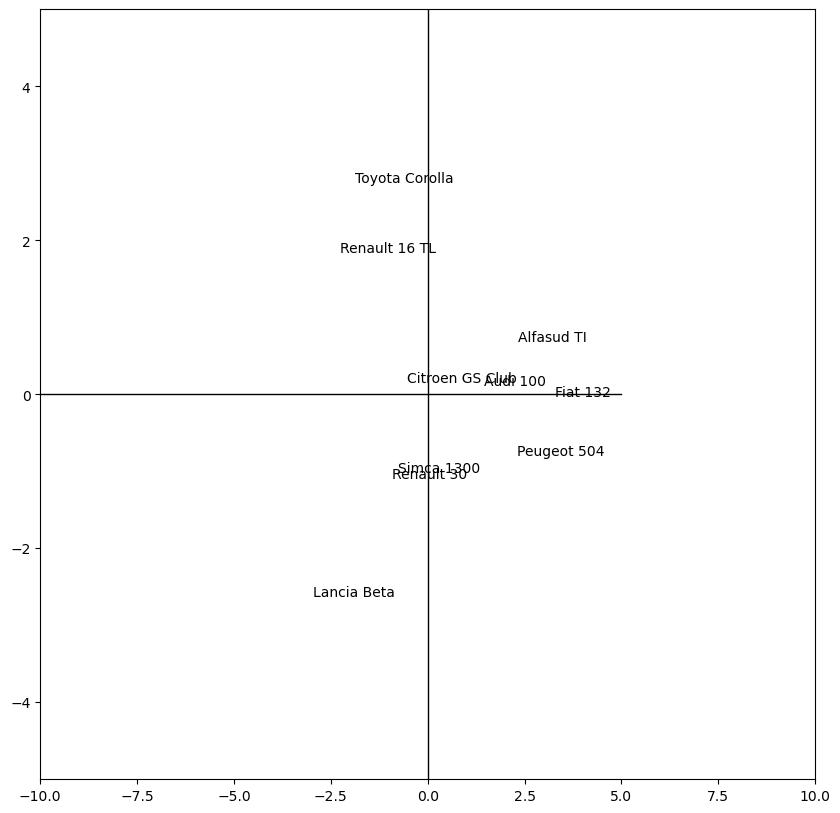

In [38]:
f,ax = plt.subplots(figsize=(10,10))
#fig, axes = plt.plot(figsize=(10,10))
ax.set_xlim(-10,10)
ax.set_ylim(-5,5)
n = X4.shape[0]
for i in range(n):
    plt.annotate(X4.index[i],(coord[i,0],coord[i,1]))
plt.plot([-10,5],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,5],color='black',linestyle='-',linewidth=1)
plt.show()

In [35]:
#Quelles sont les variables qui distinguent ces voitures?
#Comment projeter de nouvelles voitures?

#Package "prince"

In [41]:
#On peut reprendre les données initiales normalisées de l'acp 

X4_transform = acp.transform(X4)
X4_transform

X_projected = acp.inverse_transform(X4_transform)
X_projected



array([[-1.17308591, -1.00826206, -0.28823982, -1.07106492, -1.17746518,
        -0.01207264,  1.00142416,  0.88509766,  0.84519496,  0.54599063,
         0.97962953,  0.27680892],
       [-0.61815519, -0.57725334, -0.34030223, -0.6550553 , -0.65457143,
         0.21068898,  0.796304  ,  0.80737789,  0.7340277 ,  0.68214217,
         1.02160899,  0.19285001],
       [ 0.68607766,  0.47155628, -0.31576616,  0.39335887,  0.60095868,
         0.79827232,  0.2697389 ,  0.59213231,  0.53338877,  0.92787367,
         1.05611908,  0.12382982],
       [ 0.15521161,  0.18148616,  0.2352887 ,  0.23657686,  0.19148122,
         0.80367565,  0.31419002,  0.55529728,  0.84663255,  0.54422996,
         0.79705394,  0.6419601 ],
       [-1.28913517, -1.25750238, -0.92973157, -1.47196876, -1.40491444,
        -0.34304245,  1.24185416,  1.04605778,  0.59916496,  0.84731462,
         1.25575791, -0.27544784],
       [ 2.14512029,  1.58101068, -0.55010724,  1.440252  ,  1.95812611,
         1.34148135, -

In [42]:
loadings = acp.components_.T * np.sqrt(acp.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'])
loading_matrix


,PC1,PC2
0,-0.863665,-0.568352
1,-0.839249,-0.258136
2,-0.609663,0.804889
3,-0.979796,-0.064438
4,-0.938840,-0.399484
5,-0.647780,0.099474
6,0.528373,-0.017487
7,0.274164,-0.087109
8,-0.112076,0.424075
9,0.137264,-0.519384
